**Set environment**

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

import umap

import importlib.util
def import_from_file(module_name, file_path):
    spec   = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

CONFIG = import_from_file('config', '../run_config_project_sing.py')
CONFIG.show_env()

You are working on        Singularity: singularity_proj_encode_fcc
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data


You are working with      ENCODE FCC
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references



In [2]:
CONFIG.FD_REPO

'/data/reddylab/Kuei/repo'

In [3]:
CONFIG.FD_PRJ

'/data/reddylab/Kuei/repo/Proj_ENCODE_FCC'

## Import data

In [8]:
txt_fdiry = os.path.join(
    CONFIG.FD_RES, 
    "analysis_umap_cluster_by_coverage_score", 
    "fcc_astarr_macs_input_overlap",
    "test_atac_10k",
    "prepare_matrix"
)
lst = os.listdir(txt_fdiry)
for txt in lst:
    print(txt)

matrix.coverage.encode_chipseq_full_mean0.tsv


In [2]:
txt_fdiry = os.path.join(
    CONFIG.FD_RES, 
    "analysis_umap_cluster_by_coverage_score", 
    "fcc_astarr_macs_input_overlap",
    "test_atac_10k",
    "prepare_matrix"
)
txt_fname = "matrix.coverage.encode_chipseq_full_mean0.tsv"
txt_fpath = os.path.join(txt_fdiry, txt_fname)

mat = pd.read_csv(txt_fpath, sep="\t")
vec = mat.Region
mat = mat.set_index('Region')

mat_region_score = mat
print(mat.shape)
mat.head()

(10000, 521)


,H2AFZ,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me1,...,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
Region,,,,,,,,,,,,,,,,,,,,,
chr1:100184509-100184772,1.076260,1.23853,0.587342,2.211495,1.115170,0.153952,0.850396,0.215446,0.819047,0.822530,...,1.225680,0.745864,1.299090,0.577754,1.524060,0.892062,1.072520,0.980173,1.17056,1.046760
chr1:100323413-100323923,7.999950,3.22871,0.370815,0.617677,2.955725,2.662410,0.789142,0.765352,3.536375,1.360690,...,1.073350,0.708266,1.296420,2.060530,1.695290,0.982860,1.466240,0.810982,1.89416,0.676948
chr1:10032429-10033763,9.230600,9.64786,0.244743,0.506065,1.218164,23.098500,27.307250,3.983060,14.410550,0.644955,...,0.587522,0.904230,0.857230,1.053050,0.795978,0.881410,1.240870,1.343115,1.02572,0.881129
chr1:10035024-10035463,2.646500,3.21955,0.197316,0.410928,0.689291,7.541850,10.910015,5.178620,4.427495,0.680274,...,0.448574,1.064670,0.759096,0.698990,0.858055,0.801908,0.479472,2.107915,0.64705,1.104000
chr1:100394178-100394637,0.575527,1.43923,0.529181,2.710065,2.817325,1.351820,0.532915,3.040310,2.236970,1.213960,...,0.859681,1.049340,0.717190,0.834736,0.899074,1.160983,1.127340,1.064125,1.18590,1.732660


In [4]:
X = mat_region_score.to_numpy()
X.shape

(10000, 521)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


CPU times: user 25.5 s, sys: 1.96 s, total: 27.4 s
Wall time: 25.7 s


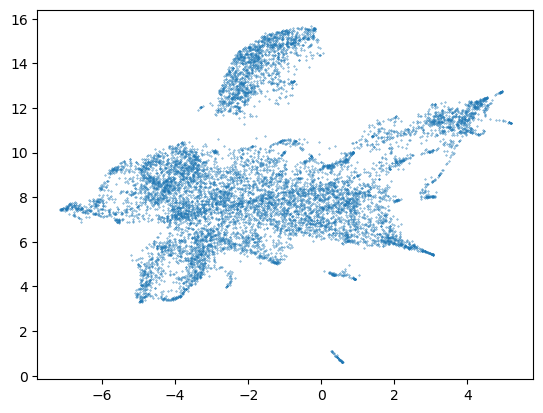

In [5]:
%%time
X_ump_n15 = umap.UMAP(n_neighbors=15, metric = "euclidean", random_state=123).fit_transform(X)
plt.scatter(X_ump_n15[:, 0], X_ump_n15[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 19.1 s, sys: 1.26 s, total: 20.4 s
Wall time: 18.9 s


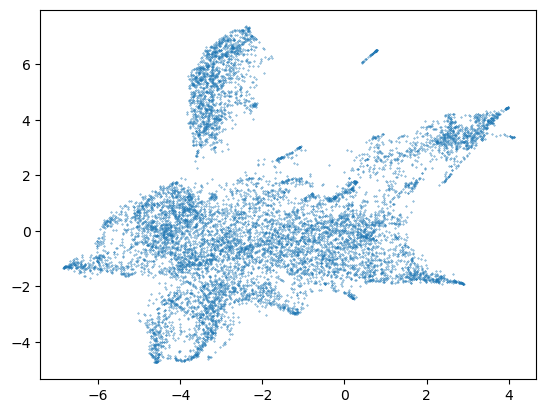

In [6]:
%%time
X_ump_n30 = umap.UMAP(n_neighbors=30, metric = "euclidean", random_state=123).fit_transform(X)
plt.scatter(X_ump_n30[:, 0], X_ump_n30[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 24.6 s, sys: 1.72 s, total: 26.3 s
Wall time: 24.4 s


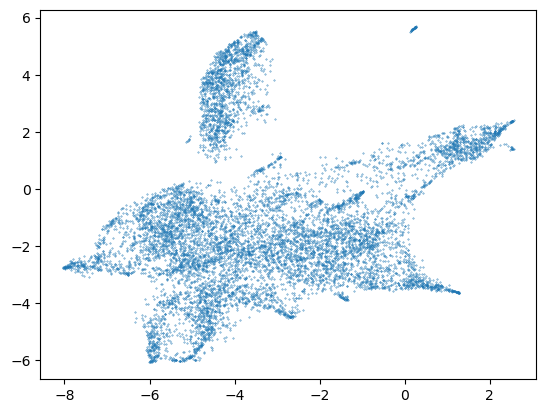

In [7]:
%%time
X_ump_n50 = umap.UMAP(n_neighbors=50, metric = "euclidean", random_state=123).fit_transform(X)
plt.scatter(X_ump_n50[:, 0], X_ump_n50[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 36.7 s, sys: 2.62 s, total: 39.3 s
Wall time: 36.5 s


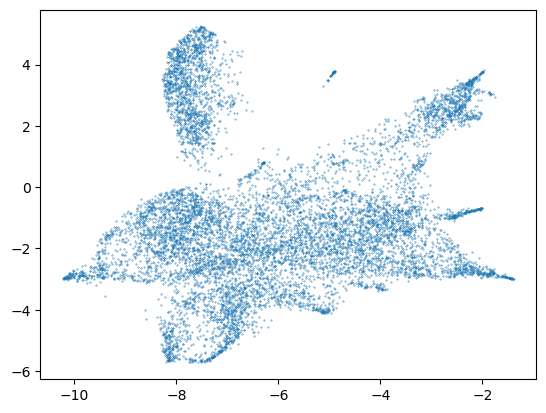

In [8]:
%%time
X_ump_n100 = umap.UMAP(n_neighbors=100, metric = "euclidean", random_state=123).fit_transform(X)
plt.scatter(X_ump_n100[:, 0], X_ump_n100[:, 1], s=0.1)

/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 36.4 s, sys: 2.21 s, total: 38.6 s
Wall time: 36.2 s


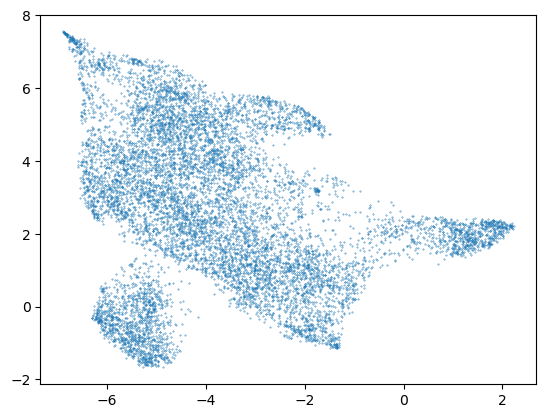

In [9]:
%%time
X_ump_n70 = umap.UMAP(n_neighbors=70, metric = "manhattan", random_state=123).fit_transform(X)
plt.scatter(X_ump_n70[:, 0], X_ump_n70[:, 1], s=0.1)